In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import svm
import pywt
import copy
import warnings
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults, ARMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pylab as plt
import matplotlib.dates as dates
from matplotlib.pylab import rcParams
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/Times Series Analysit/code/Stock_Index_BBC.csv'
df = pd.read_csv(path)

In [ ]:
df.columns

Index(['DATE', 'CLOSE'], dtype='object')

                CLOSE
DATE                 
2021-01-01  3342.2272
2021-01-02  3368.3117
2021-01-03  3367.7892
2021-01-04  3347.6665
2021-01-05  3363.9014
...               ...
2021-10-26  3879.8930
2021-10-27  3913.2689
2021-10-28  3842.7155
2021-10-29  3894.0498
2021-10-30  3898.4977

[303 rows x 1 columns]


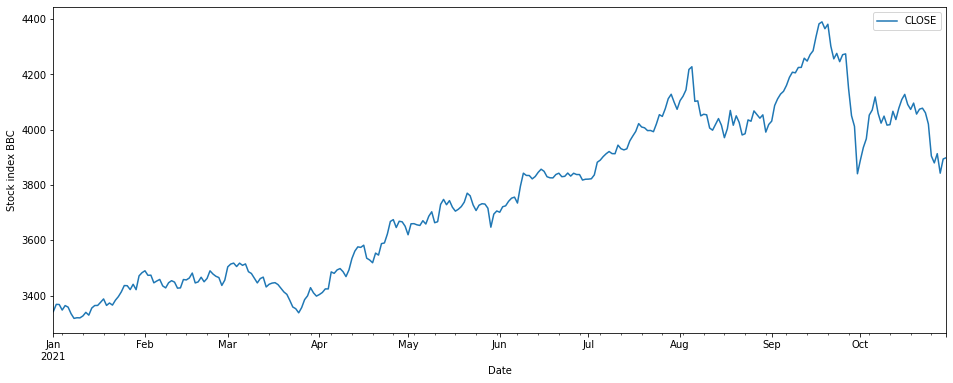

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
df.set_index(['DATE'], inplace=True)

data = df

print(data)
#plot data
data.plot(figsize = (16,6))
plt.ylabel('Stock index BBC')
plt.xlabel('Date')
plt.show()


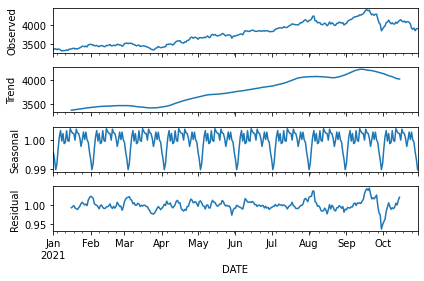

In [ ]:
decomposition = seasonal_decompose(data, model='multiplicative', freq=30)
decomposition.plot()
display(decomposition)

ACF, PACF

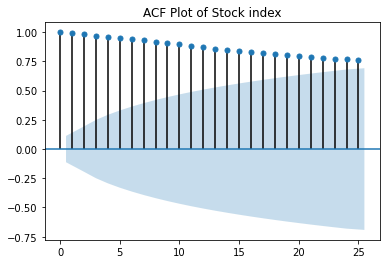

In [ ]:
acf = plot_acf(data)
plt.title("ACF Plot of Stock index")
acf.show()

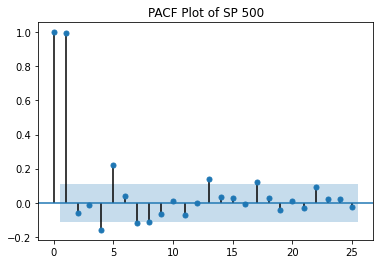

In [ ]:
pacf = plot_pacf(data)
plt.title("PACF Plot of SP 500")
pacf.show()

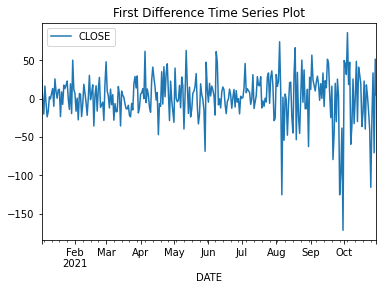

In [ ]:
stock_diff = data - data.shift()
diff = stock_diff.dropna()
diff.plot()
plt.title('First Difference Time Series Plot')
plt.show()

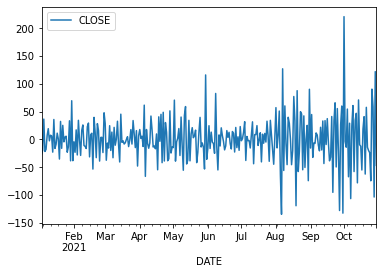

In [ ]:
diff2 = data - 2*data.shift(1) + data.shift(2)
difff = diff2.dropna()
difff.plot()

Text(0.5, 1.0, 'ACF Plot of Stock (diff1)')

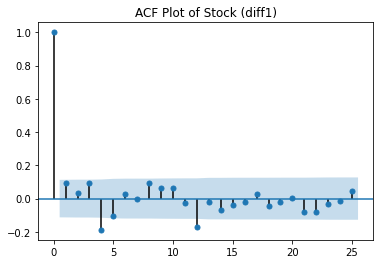

In [ ]:
acfDiff = plot_acf(diff)
plt.title("ACF Plot of Stock (diff1)")

Text(0.5, 1.0, 'PACF Plot of Stock (diff1)')

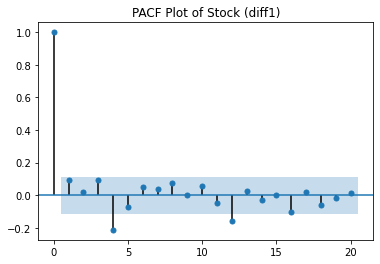

In [ ]:
pacfDiff = plot_pacf(diff, lags = 20)
plt.title("PACF Plot of Stock (diff1)")

In [ ]:
data_train = data.loc[:'10/25/2021',:]
print(data_train)
print("Data train", len(data_train))
data_test = data.loc['10/26/2021':,:]
print("Data test", len(data_test))

                CLOSE
DATE                 
2021-01-01  3342.2272
2021-01-02  3368.3117
2021-01-03  3367.7892
2021-01-04  3347.6665
2021-01-05  3363.9014
...               ...
2021-10-21  4074.2479
2021-10-22  4077.7041
2021-10-23  4061.0502
2021-10-24  4020.3490
2021-10-25  3904.9355

[298 rows x 1 columns]
Data train 298
Data test 5


Build model ARIMA

In [ ]:
stepwise_model_A = auto_arima(data_train, start_p=1, start_q=1,
                           max_p=10, max_q=10,max_d=10, m=1,
                           start_P=0, seasonal=True,
                           start_d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_A.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2869.203, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2869.203, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2867.383, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2867.493, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2868.377, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2869.277, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2871.197, Time=0.83 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2866.268, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2868.112, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2868.018, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2866.413, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2870.007, Time=0.23 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.416 seconds
2866.267808387025


In [ ]:
 mod = ARIMA(data_train, order=(1,1,0), freq = 'D')
 result  = mod.fit()
 forcast, std, conf_int =  result.forecast(5)
 print(forcast)
# model  = sm.tsa.SARIMAX(data_train, order=(1,1,0), season_order = (1,0,0,12))
# results = model.fit()
# print(results.summary())

[3893.22244093 3893.50657666 3895.17867835 3897.01135504 3898.8626088 ]


FORECAST

In [ ]:
# result = results.get_forecast(20)
# forecast = result.predicted_mean
# forcast = forecast.values
# print('      Forecast:\n',forecast)
# print()
# print('      Expected:\n',data_test)

confidence intervals

In [ ]:
# intervals = [0.2, 0.1, 0.05, 0.01]
# for a in intervals:
#   ci = result.conf_int(alpha = a)
#   print('%.0f%% Interval: %.3f to %.3f' %(100*(1-a), ci[0,0], ci[0,1]))

PREDICT

In [ ]:
#predict = results.predict(200,302,typ='levels')
#print(predict)

#data.plot()
#predict.plot()
#data_train_values = data_train['CLOSE'].to_numpy()
#Stock_for = np.concatenate((data_train_values, predict), axis=None)
#print(len(Stock_for))
#Stock_for1 = pd.Series(Stock_for, index = data.index)
#data['FORECAST'] = Stock_for1.values
#data
# data.plot()
# plt.title('Actual Vs. Forecasted  Stock Index Values')
# plt.show()

Plot forecast

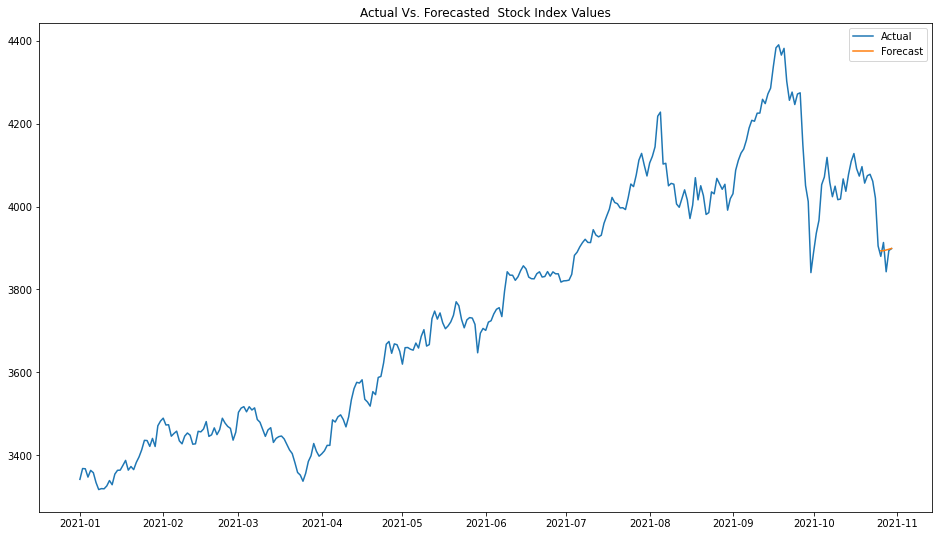

In [ ]:
#print(len(Stock_for))
Stock_for1 = pd.Series(forcast, index = data_test.index)
#data
plt.figure(figsize=(16,9))
plt.plot(data.index, data['CLOSE'])
plt.plot(Stock_for1.index,Stock_for1.values)
plt.legend(['Actual', 'Forecast'])
plt.title('Actual Vs. Forecasted  Stock Index Values')
plt.show()
# data.plot(figsize=(16,9))
# plt.title('Actual Vs. Forecasted  Stock Index Values')
# plt.show()

Validtion

In [ ]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print("MSE: {0:.3f}" .format(mean_squared_error(data_Test, forcast)))
print("RMSE: {0:.3f}" .format(np.sqrt(mean_squared_error(data_Test, forcast))))
print("MAE:{0:.3f}".format(mean_absolute_error(data_Test, forcast)))
print("MAPE:{0:.3f}" .format(MAPE(data_Test, forcast),"%"))

MSE: 665.902
RMSE: 25.805
MAE:17.776
MAPE:0.460
